In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=073b3fe4032aae4dfb71e72ae0d665a03bbdcdd2fd58970776c3a8b069ba6691
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

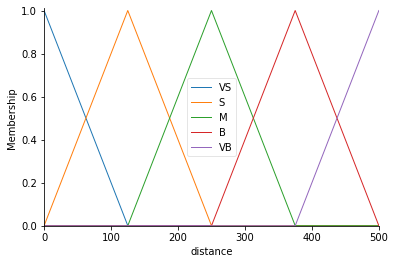

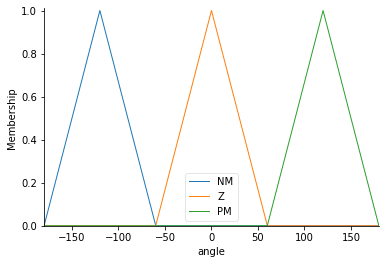

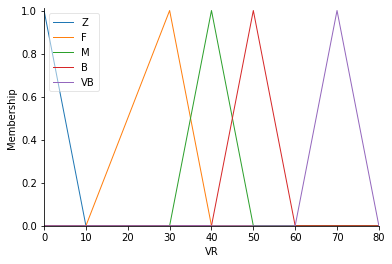

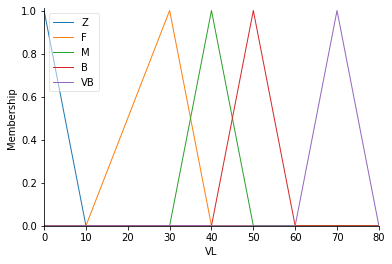

In [3]:
distance = ctrl.Antecedent(np.arange(0,500.1,0.1),'distance')
angle = ctrl.Antecedent(np.arange(-180,180.1,0.1),'angle')
VR = ctrl.Consequent(np.arange(0,80.1,0.1),'VR')
VL = ctrl.Consequent(np.arange(0,80.1,0.1),'VL')

distance['VS'] = fuzz.trimf(distance.universe,[0,0,125])
distance['S'] = fuzz.trimf(distance.universe,[0,125,250])
distance['M'] = fuzz.trimf(distance.universe,[125,250,375])
distance['B'] = fuzz.trimf(distance.universe,[250,375,500])
distance['VB'] = fuzz.trimf(distance.universe,[375,500,500])
distance.view()

angle['NM'] = fuzz.trimf(angle.universe,[-180,-120,-60])

angle['Z'] = fuzz.trimf(angle.universe,[-60,0,60])

angle['PM'] = fuzz.trimf(angle.universe,[60,120,180])

angle.view()
VR['Z'] = fuzz.trimf(VR.universe,[0,0,10])
VR['F'] = fuzz.trimf(VR.universe,[10,30,40])
VR['M'] = fuzz.trimf(VR.universe,[30,40,50])
VR['B'] = fuzz.trimf(VR.universe,[40,50,60])
VR['VB'] = fuzz.trimf(VR.universe,[60,70,80])
VR.view()
VL['Z'] = fuzz.trimf(VL.universe,[0,0,10])
VL['F'] = fuzz.trimf(VL.universe,[10,30,40])
VL['M'] = fuzz.trimf(VL.universe,[30,40,50])
VL['B'] = fuzz.trimf(VL.universe,[40,50,60])
VL['VB'] = fuzz.trimf(VL.universe,[60,70,80])
VL.view()

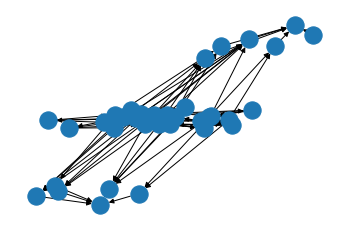

In [6]:

rule1 = ctrl.Rule(distance['VS'] & angle['NM'], (VR['M'],VL['Z']))
rule2 = ctrl.Rule(distance['VS'] & angle['Z'], (VR['Z'],VL['F']));
rule3 = ctrl.Rule(distance['VS'] & angle['PM'], (VR['Z'],VL['F']))

rule4 = ctrl.Rule(distance['S'] & angle['NM'], (VR['B'],VL['Z']))
rule5 = ctrl.Rule(distance['S'] & angle['Z'], (VR['Z'],VL['F']));
rule6 = ctrl.Rule(distance['S'] & angle['PM'], (VR['Z'],VL['B']))

rule7 = ctrl.Rule(distance['M'] & angle['NM'], (VR['VB'],VL['Z']))
rule8 = ctrl.Rule(distance['M'] & angle['Z'], (VR['M'],VL['M']))
rule9 = ctrl.Rule(distance['M'] & angle['PM'], (VR['Z'],VL['VB']))

rule10 = ctrl.Rule(distance['B'] & angle['NM'], (VR['VB'],VL['Z']))
rule11 = ctrl.Rule(distance['B'] & angle['Z'], (VR['B'],VL['B']))
rule12 = ctrl.Rule(distance['B'] & angle['PM'], (VR['Z'],VL['VB']))

rule13 = ctrl.Rule(distance['VB'] & angle['NM'], (VR['VB'],VL['Z']))
rule14 = ctrl.Rule(distance['VB'] & angle['Z'], (VR['VB'],VL['VB']))
rule15 = ctrl.Rule(distance['VB'] & angle['PM'], (VR['Z'],VL['VB']))

velocity_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
velocity_ctrl.view()

4.404761904761904
25.595238095238084


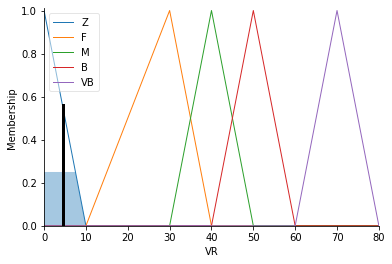

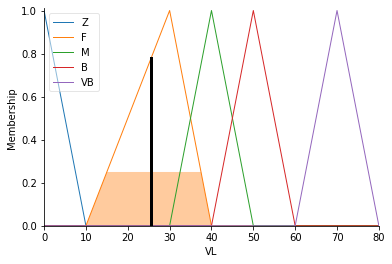

In [8]:
velocity_value = ctrl.ControlSystemSimulation(velocity_ctrl)
velocity_value.input['distance'] = 100
velocity_value.input['angle'] = 45
velocity_value.compute()
print(velocity_value.output['VR'])
VR.view(sim=velocity_value)
print(velocity_value.output['VL'])
VL.view(sim=velocity_value)